### TensorFlow 2.0 선택

In [0]:
## Google Colab에서 TensorFlow 2.x 버전을 사용하기 위해서는 아래 magic command를 수행하면 간편하게 할 수 있습니다

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# RNN Basics

RNN의 API의 사용법과, input shape, output shape 등의 기본적인 것들에 대해서 알아봅니다.

In [0]:
## library import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.2.0-rc1
2.2.4-tf


## Preparing Dataset

In [0]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

## Batching input

![image](https://cloud.githubusercontent.com/assets/901975/23383681/9943a9fc-fd82-11e6-8121-bd187994e249.png)

In [0]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batches 'hello', 'eolll', 'lleel'
x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[ 0.05269315 -0.3689666 ]
  [-0.06455702  0.7603173 ]
  [-0.92473614 -0.47161573]
  [-0.16521175 -0.71177536]
  [ 0.7898134  -0.00708489]]

 [[-0.37336466  0.6747298 ]
  [-0.15562487 -0.5940807 ]
  [-0.30868754 -0.12634169]
  [-0.60723275 -0.40786174]
  [-0.32463962 -0.5477725 ]]

 [[-0.73070467 -0.18530788]
  [-0.4641771  -0.6686463 ]
  [ 0.37646088  0.5486157 ]
  [-0.7769213   0.7538433 ]
  [-0.87805796 -0.8267859 ]]], shape: (3, 5, 2) 

states: [[ 0.7898134  -0.00708489]
 [-0.32463962 -0.5477725 ]
 [-0.87805796 -0.8267859 ]], shape: (3, 2)


## No return sequences

In [0]:
rnn = layers.SimpleRNN(units=2, return_sequences=False, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[-0.3839528   0.28362656]
 [-0.61242723  0.85259306]
 [-0.63457316  0.9056991 ]], shape: (3, 2) 

states: [[-0.3839528   0.28362656]
 [-0.61242723  0.85259306]
 [-0.63457316  0.9056991 ]], shape: (3, 2)


## No return state

In [0]:
rnn = layers.SimpleRNN(units=2, return_sequences=False, return_state=False) 

outputs = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[-0.09980034  0.50619066]
 [ 0.17885485 -0.3112874 ]
 [ 0.22101952 -0.7762307 ]], shape: (3, 2) 



## GRU

In [0]:
rnn = layers.GRU(units=2, return_sequences=False, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[-0.45150638  0.10212363]
 [-0.4451919  -0.37023786]
 [-0.1796478  -0.2557595 ]], shape: (3, 2) 

states: [[-0.45150638  0.10212363]
 [-0.4451919  -0.37023786]
 [-0.1796478  -0.2557595 ]], shape: (3, 2)


## LSTM

In [0]:
rnn = layers.LSTM(units=2, return_sequences=False, return_state=True)    
outputs, h_states, c_states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('hidden_states: {}, shape: {}'.format(h_states, h_states.shape))
print('cell_states: {}, shape: {}'.format(c_states, c_states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[0.14417611 0.01527193]
 [0.03745333 0.18166476]
 [0.1534145  0.10085381]], shape: (3, 2) 

hidden_states: [[0.14417611 0.01527193]
 [0.03745333 0.18166476]
 [0.1534145  0.10085381]], shape: (3, 2)
cell_states: [[0.518406   0.02735751]
 [0.07480746 0.2943441 ]
 [0.30534688 0.16292773]], shape: (3, 2)


## Stacked RNN

In [0]:
model = keras.Sequential()
model.add(layers.SimpleRNN(2, return_sequences=True, input_shape=(5,4)))
model.add(layers.SimpleRNN(2, return_sequences=True))
model.add(layers.SimpleRNN(2, return_sequences=True))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 5, 2)              14        
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 5, 2)              10        
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 5, 2)              10        
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


# RNN을 이용하여 MNIST Classification 학습하기 
  

MNIST Image를 한 line씩 RNN에 입력하여 classification을 하는 실습을 해보겠습니다.

In [0]:
## Hyper-parameters
learning_rate = 0.001
N_EPOCHS = 20
N_BATCH = 100
N_CLASS = 10

In [0]:
## Data 준비
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [0]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]
print(train_images.shape, test_images.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [0]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(N_BATCH).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(N_BATCH)

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(units=256, return_sequences=False, input_shape=(28,28)))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [0]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
Total params: 294,410
Trainable params: 294,410
Non-trainable params: 0
_________________________________________________________________


In [0]:
## 학습 전에 결과 확인
model.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 2.3072 - accuracy: 0.0979


[2.307217836380005, 0.09790000319480896]

In [0]:
## Parameters for training
steps_per_epoch = N_TRAIN//N_BATCH
validation_steps = N_TEST//N_BATCH
print(steps_per_epoch, validation_steps)

600 100


In [0]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 5s 8ms/step - loss: 0.3855 - accuracy: 0.8728 - val_loss: 0.1608 - val_accuracy: 0.9486
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.1191 - accuracy: 0.9629 - val_loss: 0.1091 - val_accuracy: 0.9662
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0778 - accuracy: 0.9758 - val_loss: 0.0687 - val_accuracy: 0.9791
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0604 - accuracy: 0.9817 - val_loss: 0.0687 - val_accuracy: 0.9784
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0628 - val_accuracy: 0.9809
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.0517 - val_accuracy: 0.9837
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0512 - val_accuracy: 0.9843
Epoch 

In [0]:
## 결과 확인
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(N_CLASS), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(N_CLASS), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

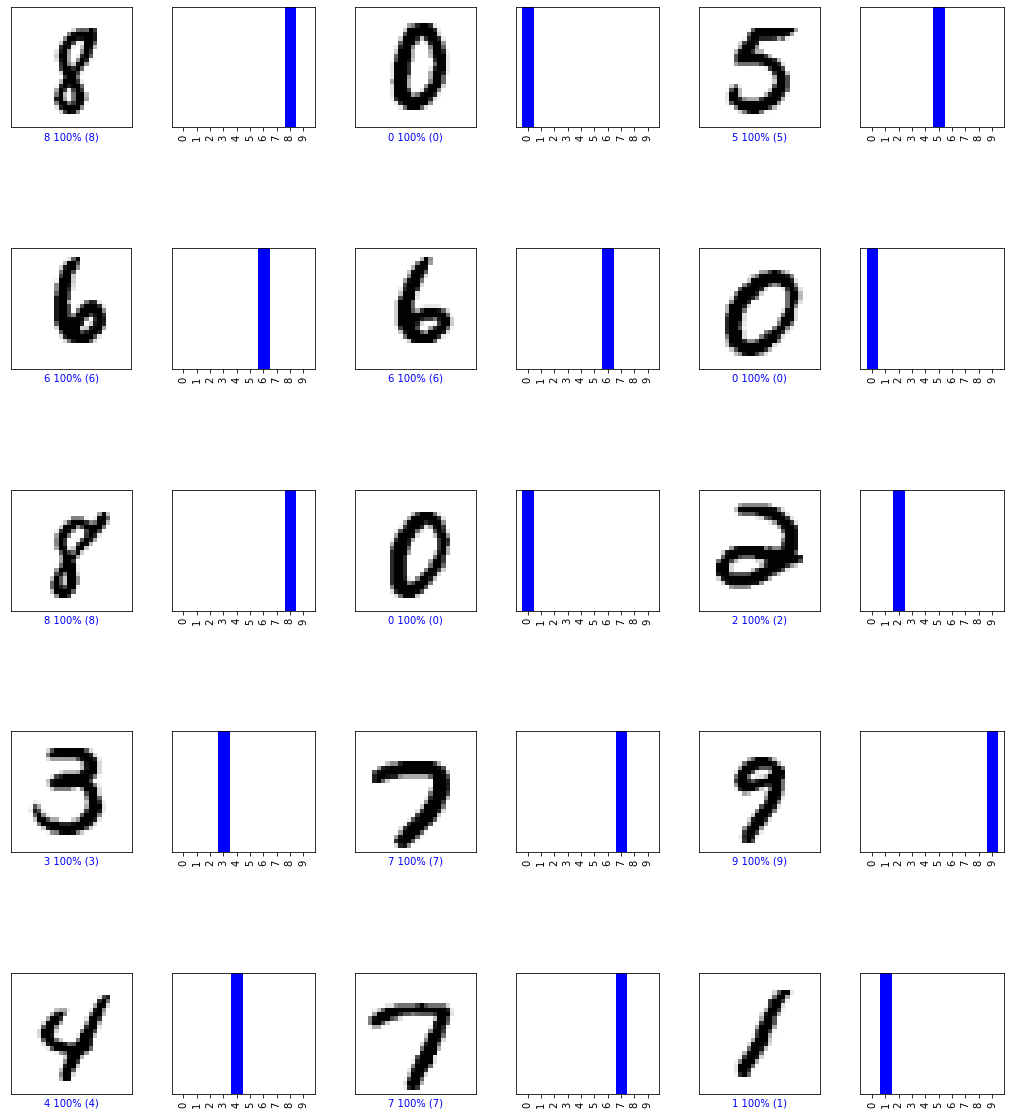

In [0]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Simple Language Model with RNN

RNN을 이용하여 간단한 language model을 학습시켜 보겠습니다.

In [0]:
## 학습시킬 문장
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

## index를 주면 charcter로 바꿔주는 list
idx2char = list(set(sentence))
## character를 주면 index로 바꿔주는 dictionary
char2idx = {w: i for i, w in enumerate(idx2char)}

In [0]:
idx2char, len(idx2char)

(['k',
  'u',
  "'",
  'i',
  'o',
  '.',
  'h',
  'n',
  ' ',
  'y',
  'r',
  'b',
  't',
  'e',
  'f',
  'g',
  ',',
  'w',
  'l',
  'm',
  'p',
  'd',
  'a',
  's',
  'c'],
 25)

In [0]:
char2idx

{' ': 8,
 "'": 2,
 ',': 16,
 '.': 5,
 'a': 22,
 'b': 11,
 'c': 24,
 'd': 21,
 'e': 13,
 'f': 14,
 'g': 15,
 'h': 6,
 'i': 3,
 'k': 0,
 'l': 18,
 'm': 19,
 'n': 7,
 'o': 4,
 'p': 20,
 'r': 10,
 's': 23,
 't': 12,
 'u': 1,
 'w': 17,
 'y': 9}

In [0]:
## HyperParameters
data_dim = len(idx2char)
hidden_size = len(idx2char)
num_classes = len(idx2char)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1
training_epochs = 200
print(num_classes)

25


In [0]:
## Dataset
dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char2idx[c] for c in x_str]  # x str to index
    y = [char2idx[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [0]:
dataX = np.array(to_categorical(dataX, num_classes))
dataY = np.array(to_categorical(dataY, num_classes))
print(dataX.shape, dataY.shape)
print(batch_size)

(170, 10, 25) (170, 10, 25)
170


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((dataX, dataY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(units=hidden_size, return_sequences=True,
                                     input_shape=(dataX.shape[1],dataX.shape[2])))
    model.add(layers.LSTM(units=hidden_size, return_sequences=True))
    model.add(layers.Dense(units=num_classes, activation='softmax'))
    return model

In [0]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 25)            5100      
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 25)            5100      
_________________________________________________________________
dense_1 (Dense)              (None, 10, 25)            650       
Total params: 10,850
Trainable params: 10,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
## Training
model.fit(train_dataset, epochs=training_epochs,
                    steps_per_epoch=dataX.shape[0]//batch_size)

Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 3.2191
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 3.0528
Epoch 3/200
1/1 [==============================] - 0s 954us/step - loss: 3.1201
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 2.9462
Epoch 5/200
1/1 [==============================] - 0s 941us/step - loss: 2.8897
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 2.8769
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 2.8791
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 2.8697
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 2.8527
Epoch 10/200
1/1 [==============================] - 0s 930us/step - loss: 2.8388
Epoch 11/200
1/1 [==============================] - 0s 928us/step - loss: 2.8186
Epoch 12/200
1/1 [==============================] - 0s 1ms/step - loss: 2.7955
Epoch 13/200
1/1 [==============================] - 0

In [0]:
## 결과 확인
results = model.predict(dataX, steps=1)
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([idx2char[t] for t in index]), end='')
    else:
        print(idx2char[index[-1]], end='')

m you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

# Simple Language Model with MLP

Multi-layer Perceptron을 이용하여 아주 간단한 language model을 학습시켜 보겠습니다.

In [0]:
## 학습시킬 문장
sentence = " if you want you"
## index를 주면 charcter로 바꿔주는 list
idx2char = list(set(sentence))
## character를 주면 index로 바꿔주는 dictionary
char2idx = {w: i for i, w in enumerate(idx2char)}

print(idx2char)
print(char2idx)

['u', 'w', 'y', 'i', 'o', 'a', 'n', 't', ' ', 'f']
{'u': 0, 'w': 1, 'y': 2, 'i': 3, 'o': 4, 'a': 5, 'n': 6, 't': 7, ' ': 8, 'f': 9}


In [0]:
## HyperParameters
data_dim = len(idx2char)
hidden_size = len(idx2char)
num_classes = len(idx2char)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1
batch_size = 1
training_epochs = 30
print(num_classes)

10


In [0]:
## Dataset 만들기
sentence_idx = [char2idx[c] for c in sentence]
dataX = [sentence_idx[:-1]]
dataY = [sentence_idx[1:]]
print(''.join([idx2char[t] for t in dataX[0]]), end='')
print()
print(''.join([idx2char[t] for t in dataY[0]]), end='')

 if you want yo
if you want you

In [0]:
dataX = np.array(to_categorical(dataX, num_classes))
dataY = np.array(to_categorical(dataY, num_classes))
print(dataX.shape, dataY.shape)

(1, 15, 10) (1, 15, 10)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((dataX, dataY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=num_classes, activation='relu',
                                input_shape=(dataX.shape[1],dataX.shape[2])))
    model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
    return model

In [0]:
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15, 10)            110       
_________________________________________________________________
dense_3 (Dense)              (None, 15, 10)            110       
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy')

In [0]:
## Training
model.fit(train_dataset, epochs=training_epochs,
                    steps_per_epoch=dataX.shape[0]//batch_size)

Epoch 1/30
1/1 [==============================] - 0s 1ms/step - loss: 2.2874
Epoch 2/30
1/1 [==============================] - 0s 986us/step - loss: 2.0534
Epoch 3/30
1/1 [==============================] - 0s 908us/step - loss: 1.8370
Epoch 4/30
1/1 [==============================] - 0s 1ms/step - loss: 1.6039
Epoch 5/30
1/1 [==============================] - 0s 2ms/step - loss: 1.3418
Epoch 6/30
1/1 [==============================] - 0s 916us/step - loss: 1.0717
Epoch 7/30
1/1 [==============================] - 0s 1ms/step - loss: 0.8151
Epoch 8/30
1/1 [==============================] - 0s 1ms/step - loss: 0.5953
Epoch 9/30
1/1 [==============================] - 0s 1ms/step - loss: 0.4436
Epoch 10/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3602
Epoch 11/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3170
Epoch 12/30
1/1 [==============================] - 0s 1ms/step - loss: 0.2972
Epoch 13/30
1/1 [==============================] - 0s 1ms/step - lo

In [0]:
## 결과 확인
results = model.predict(dataX, steps=1)
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([idx2char[t] for t in index]), end='')
    else:
        print(idx2char[index[-1]], end='')

yf you yant you

# Stock Prediction with RNN  
RNN을 이용한 간단한 주식 예측 모델을 학습해보겠습니다.

In [0]:
## google drive 연동
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## HyperParameters
seq_length = 7
data_dim = 5
hidden_size = 10
output_dim = 1
learning_rate = 0.001
training_epochs = 200
batch_size = 25

In [0]:
## Data Preprocessing
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [0]:
## Data 준비
# Open, High, Low, Volume, Close
xy = np.loadtxt('/content/drive/My Drive/TensorFlow_Training_15th/data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy).astype(np.float32)
x = xy
y = xy[:, [-1]]  # Close as label

In [0]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    if i % 100 == 0:
      print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.1375105e-01 2.0817982e-01 1.9179183e-01 4.6607511e-04 1.9209240e-01]
 [1.9393504e-01 2.0364192e-01 2.0866457e-01 2.9846733e-03 1.9655156e-01]
 [2.1051645e-01 2.0528941e-01 2.0355874e-01 2.5992651e-04 1.8774973e-01]
 [1.8667877e-01 2.0948057e-01 2.0878184e-01 0.0000000e+00 2.1744815e-01]
 [3.0697387e-01 3.1463414e-01 2.1899366e-01 1.2476472e-02 2.1698189e-01]
 [2.1914211e-01 2.6390722e-01 2.2468640e-01 4.5632339e-01 2.2496748e-01]
 [2.3312993e-01 2.3641916e-01 1.6268273e-01 5.7017118e-01 1.4744274e-01]] -> [0.13289961]
[[0.2632911  0.26408058 0.2829926  0.08700368 0.2748631 ]
 [0.26585564 0.26223072 0.27879643 0.09221116 0.26795578]
 [0.25985247 0.2558718  0.27460024 0.08128529 0.2646917 ]
 [0.2591822  0.25799906 0.27313316 0.07000986 0.26233095]
 [0.26247513 0.25731692 0.2683208  0.12131397 0.25545287]
 [0.25239235 0.2480676  0.2612195  0.146249   0.24863295]
 [0.24076502 0.23850042 0.24221338 0.1519584  0.22863965]] -> [0.2233937]
[[0.00084512 0.         0.         0.20783365 0.  

In [0]:
## Train/Test Split
train_size = int(len(dataY) * 0.7 + 18)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(525, 7, 5) (525, 1)
(200, 7, 5) (200, 1)


In [0]:
## Dataset 만들기
train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((testX, testY)).prefetch(
                buffer_size=batch_size).batch(batch_size)

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=hidden_size, return_sequences=True,
                                     input_shape=(trainX.shape[1],trainX.shape[2])))
    model.add(keras.layers.LSTM(units=hidden_size))
    model.add(keras.layers.Dense(units=output_dim))
    return model

In [0]:
model = create_model()
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate),
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 10)             640       
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [0]:
## Training
model.fit(train_dataset, epochs=training_epochs,
          steps_per_epoch=trainX.shape[0]//batch_size,
          validation_data=test_dataset,
          validation_steps=testX.shape[0]//batch_size)

Epoch 1/200
21/21 [==============================] - 1s 33ms/step - loss: 0.0735 - root_mean_squared_error: 0.2711 - val_loss: 0.1333 - val_root_mean_squared_error: 0.3652
Epoch 2/200
21/21 [==============================] - 0s 7ms/step - loss: 0.0135 - root_mean_squared_error: 0.1162 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1820
Epoch 3/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0975
Epoch 4/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0033 - root_mean_squared_error: 0.0574 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0599
Epoch 5/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0639
Epoch 6/200
21/21 [==============================] - 0s 7ms/step - loss: 0.0031 - root_mean_squared_error: 0.0561 - val_loss: 0.0053 - val_root_

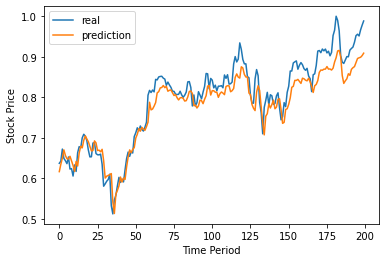

In [0]:
## 결과확인
prediction = model.predict(test_dataset)

plt.plot(testY)
plt.plot(prediction)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend(['real', 'prediction'])
plt.show()